# 

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)  # Reshape for one-hot encoding

# One-hot encoding
ohe = OneHotEncoder(sparse_output=False)
y_onehot = ohe.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [3]:
# Define MLP model class
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_units, output_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_units)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_units, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Training function with hyperparameter tuning
def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, epochs):
    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, torch.max(y_batch, 1)[1])
            loss.backward()
            optimizer.step()
    
    # Evaluate
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            y_pred.extend(torch.argmax(outputs, axis=1).numpy())
            y_true.extend(torch.argmax(y_batch, axis=1).numpy())
    
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, f1, y_true, y_pred

Batch Size: 2, LR: 0.001, Epochs: 1 -> Accuracy: 0.6333, F1: 0.5609


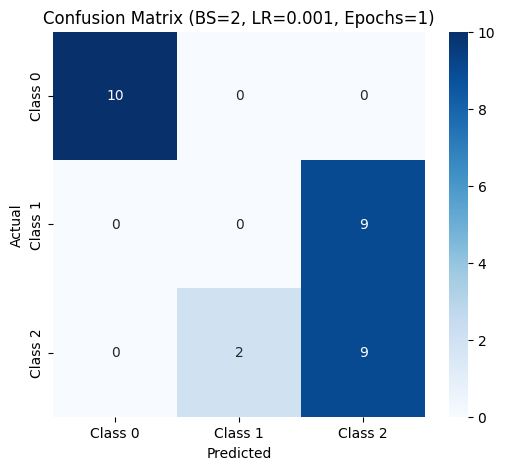

Sample Predictions:
Input: [ 0.31099755 -0.592373    0.53540856  0.00087755], Prediction: 2, Truth: 1
Input: [-0.17367394  1.7095946  -1.1697142  -1.1838121 ], Prediction: 0, Truth: 0
Input: [ 2.2496834 -1.0527666  1.7858319  1.4488316], Prediction: 1, Truth: 2
Input: [ 0.18982966 -0.36217624  0.4217337   0.3957741 ], Prediction: 2, Truth: 1
Input: [ 1.1591727  -0.592373    0.592246    0.26414192], Prediction: 2, Truth: 1
Batch Size: 2, LR: 0.001, Epochs: 3 -> Accuracy: 0.9333, F1: 0.9307


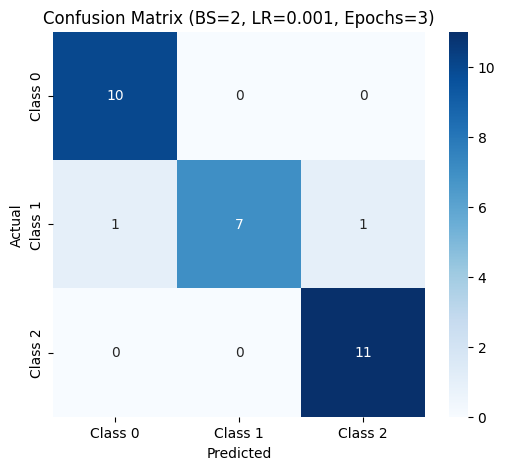

Sample Predictions:
Input: [ 0.31099755 -0.592373    0.53540856  0.00087755], Prediction: 1, Truth: 1
Input: [-0.17367394  1.7095946  -1.1697142  -1.1838121 ], Prediction: 0, Truth: 0
Input: [ 2.2496834 -1.0527666  1.7858319  1.4488316], Prediction: 2, Truth: 2
Input: [ 0.18982966 -0.36217624  0.4217337   0.3957741 ], Prediction: 1, Truth: 1
Input: [ 1.1591727  -0.592373    0.592246    0.26414192], Prediction: 0, Truth: 1
Batch Size: 2, LR: 0.001, Epochs: 5 -> Accuracy: 0.9333, F1: 0.9319


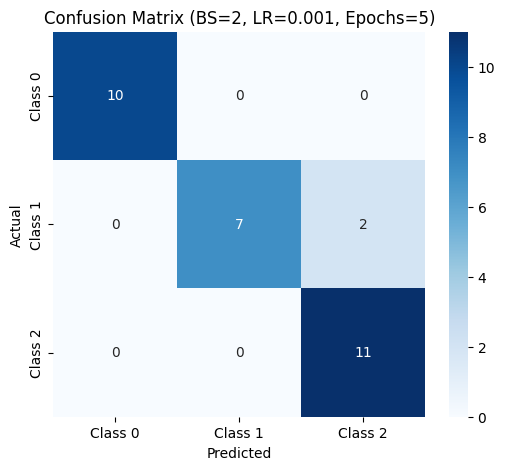

Sample Predictions:
Input: [ 0.31099755 -0.592373    0.53540856  0.00087755], Prediction: 1, Truth: 1
Input: [-0.17367394  1.7095946  -1.1697142  -1.1838121 ], Prediction: 0, Truth: 0
Input: [ 2.2496834 -1.0527666  1.7858319  1.4488316], Prediction: 2, Truth: 2
Input: [ 0.18982966 -0.36217624  0.4217337   0.3957741 ], Prediction: 1, Truth: 1
Input: [ 1.1591727  -0.592373    0.592246    0.26414192], Prediction: 2, Truth: 1
Batch Size: 2, LR: 1e-05, Epochs: 1 -> Accuracy: 0.1667, F1: 0.1048


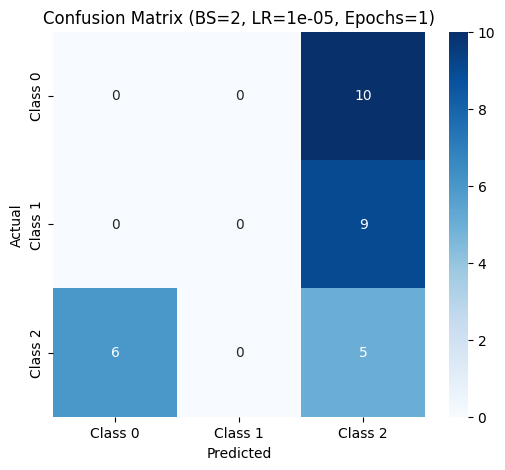

Sample Predictions:
Input: [ 0.31099755 -0.592373    0.53540856  0.00087755], Prediction: 2, Truth: 1
Input: [-0.17367394  1.7095946  -1.1697142  -1.1838121 ], Prediction: 2, Truth: 0
Input: [ 2.2496834 -1.0527666  1.7858319  1.4488316], Prediction: 0, Truth: 2
Input: [ 0.18982966 -0.36217624  0.4217337   0.3957741 ], Prediction: 2, Truth: 1
Input: [ 1.1591727  -0.592373    0.592246    0.26414192], Prediction: 2, Truth: 1
Batch Size: 2, LR: 1e-05, Epochs: 3 -> Accuracy: 0.5000, F1: 0.4085


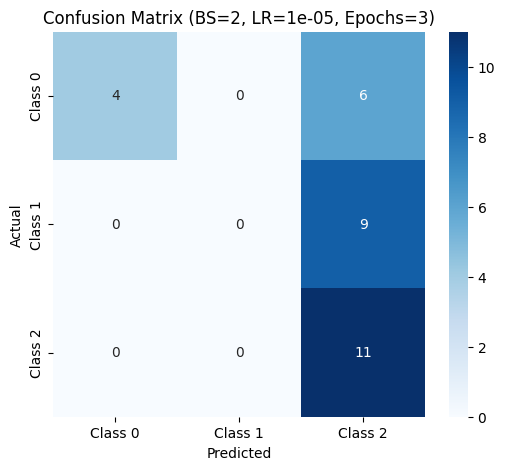

Sample Predictions:
Input: [ 0.31099755 -0.592373    0.53540856  0.00087755], Prediction: 2, Truth: 1
Input: [-0.17367394  1.7095946  -1.1697142  -1.1838121 ], Prediction: 2, Truth: 0
Input: [ 2.2496834 -1.0527666  1.7858319  1.4488316], Prediction: 2, Truth: 2
Input: [ 0.18982966 -0.36217624  0.4217337   0.3957741 ], Prediction: 2, Truth: 1
Input: [ 1.1591727  -0.592373    0.592246    0.26414192], Prediction: 2, Truth: 1
Batch Size: 2, LR: 1e-05, Epochs: 5 -> Accuracy: 0.2333, F1: 0.1760


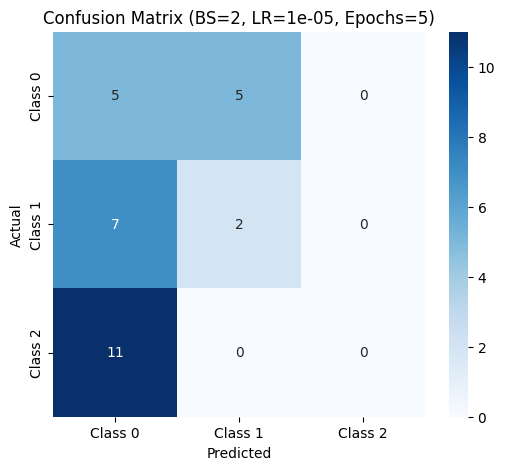

Sample Predictions:
Input: [ 0.31099755 -0.592373    0.53540856  0.00087755], Prediction: 0, Truth: 1
Input: [-0.17367394  1.7095946  -1.1697142  -1.1838121 ], Prediction: 0, Truth: 0
Input: [ 2.2496834 -1.0527666  1.7858319  1.4488316], Prediction: 0, Truth: 2
Input: [ 0.18982966 -0.36217624  0.4217337   0.3957741 ], Prediction: 0, Truth: 1
Input: [ 1.1591727  -0.592373    0.592246    0.26414192], Prediction: 0, Truth: 1
Batch Size: 4, LR: 0.001, Epochs: 1 -> Accuracy: 0.3667, F1: 0.2309


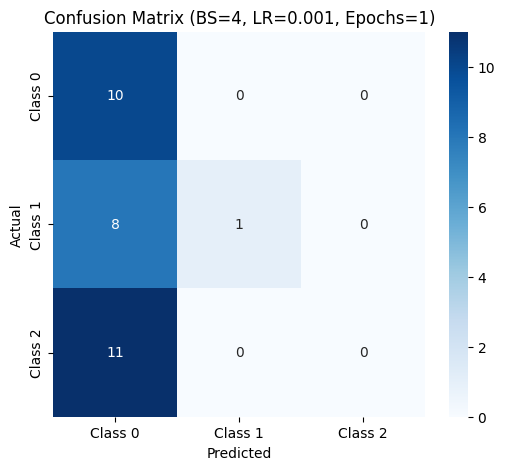

Sample Predictions:
Input: [ 0.31099755 -0.592373    0.53540856  0.00087755], Prediction: 0, Truth: 1
Input: [-0.17367394  1.7095946  -1.1697142  -1.1838121 ], Prediction: 0, Truth: 0
Input: [ 2.2496834 -1.0527666  1.7858319  1.4488316], Prediction: 0, Truth: 2
Input: [ 0.18982966 -0.36217624  0.4217337   0.3957741 ], Prediction: 0, Truth: 1
Input: [ 1.1591727  -0.592373    0.592246    0.26414192], Prediction: 0, Truth: 1
Batch Size: 4, LR: 0.001, Epochs: 3 -> Accuracy: 0.7333, F1: 0.7130


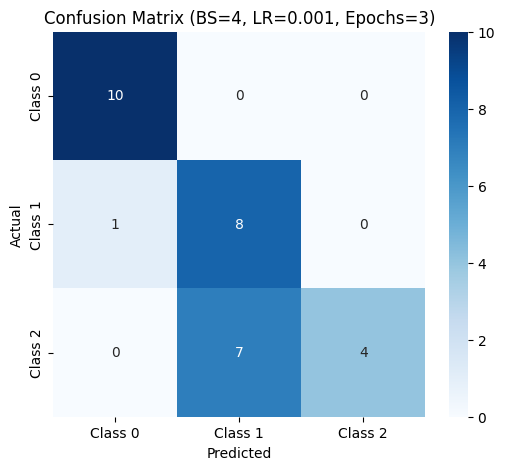

Sample Predictions:
Input: [ 0.31099755 -0.592373    0.53540856  0.00087755], Prediction: 1, Truth: 1
Input: [-0.17367394  1.7095946  -1.1697142  -1.1838121 ], Prediction: 0, Truth: 0
Input: [ 2.2496834 -1.0527666  1.7858319  1.4488316], Prediction: 2, Truth: 2
Input: [ 0.18982966 -0.36217624  0.4217337   0.3957741 ], Prediction: 1, Truth: 1
Input: [ 1.1591727  -0.592373    0.592246    0.26414192], Prediction: 1, Truth: 1
Batch Size: 4, LR: 0.001, Epochs: 5 -> Accuracy: 0.8000, F1: 0.7662


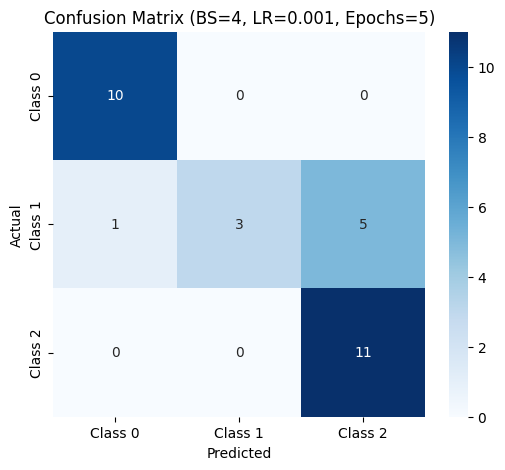

Sample Predictions:
Input: [ 0.31099755 -0.592373    0.53540856  0.00087755], Prediction: 2, Truth: 1
Input: [-0.17367394  1.7095946  -1.1697142  -1.1838121 ], Prediction: 0, Truth: 0
Input: [ 2.2496834 -1.0527666  1.7858319  1.4488316], Prediction: 2, Truth: 2
Input: [ 0.18982966 -0.36217624  0.4217337   0.3957741 ], Prediction: 2, Truth: 1
Input: [ 1.1591727  -0.592373    0.592246    0.26414192], Prediction: 2, Truth: 1
Batch Size: 4, LR: 1e-05, Epochs: 1 -> Accuracy: 0.3000, F1: 0.1385


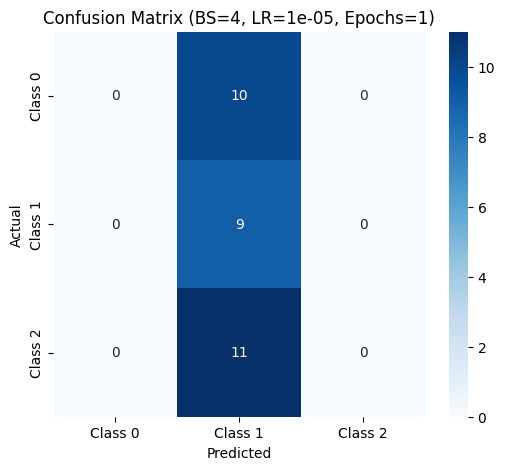

Sample Predictions:
Input: [ 0.31099755 -0.592373    0.53540856  0.00087755], Prediction: 1, Truth: 1
Input: [-0.17367394  1.7095946  -1.1697142  -1.1838121 ], Prediction: 1, Truth: 0
Input: [ 2.2496834 -1.0527666  1.7858319  1.4488316], Prediction: 1, Truth: 2
Input: [ 0.18982966 -0.36217624  0.4217337   0.3957741 ], Prediction: 1, Truth: 1
Input: [ 1.1591727  -0.592373    0.592246    0.26414192], Prediction: 1, Truth: 1
Batch Size: 4, LR: 1e-05, Epochs: 3 -> Accuracy: 0.5000, F1: 0.3895


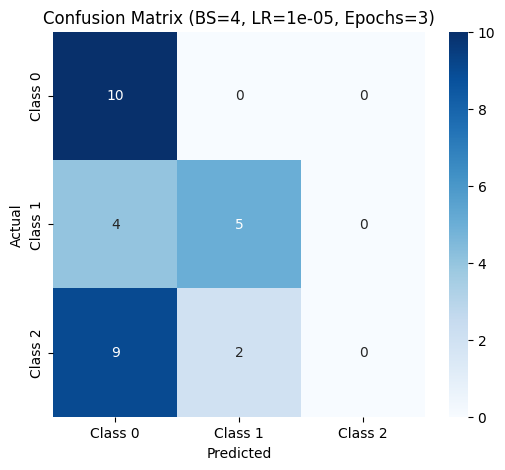

Sample Predictions:
Input: [ 0.31099755 -0.592373    0.53540856  0.00087755], Prediction: 1, Truth: 1
Input: [-0.17367394  1.7095946  -1.1697142  -1.1838121 ], Prediction: 0, Truth: 0
Input: [ 2.2496834 -1.0527666  1.7858319  1.4488316], Prediction: 1, Truth: 2
Input: [ 0.18982966 -0.36217624  0.4217337   0.3957741 ], Prediction: 0, Truth: 1
Input: [ 1.1591727  -0.592373    0.592246    0.26414192], Prediction: 0, Truth: 1
Batch Size: 4, LR: 1e-05, Epochs: 5 -> Accuracy: 0.7667, F1: 0.7636


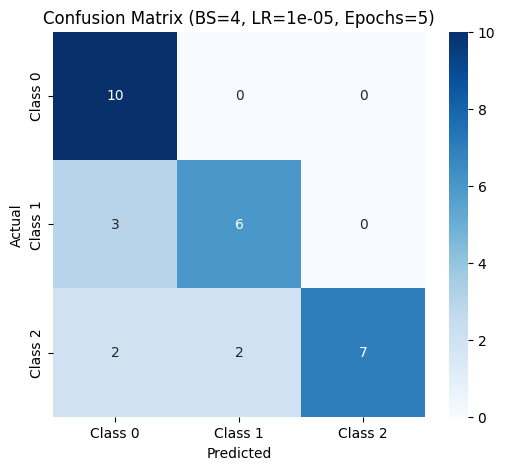

Sample Predictions:
Input: [ 0.31099755 -0.592373    0.53540856  0.00087755], Prediction: 1, Truth: 1
Input: [-0.17367394  1.7095946  -1.1697142  -1.1838121 ], Prediction: 0, Truth: 0
Input: [ 2.2496834 -1.0527666  1.7858319  1.4488316], Prediction: 1, Truth: 2
Input: [ 0.18982966 -0.36217624  0.4217337   0.3957741 ], Prediction: 0, Truth: 1
Input: [ 1.1591727  -0.592373    0.592246    0.26414192], Prediction: 1, Truth: 1


In [4]:
# Hyperparameter search
batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs_list = [1, 3, 5]

results = []

for batch_size in batch_sizes:
    for lr in learning_rates:
        for epochs in epochs_list:
            # Prepare DataLoader
            train_dataset = TensorDataset(X_train, y_train)
            test_dataset = TensorDataset(X_test, y_test)
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
            
            # Initialize model, loss, optimizer
            model = MLPModel(input_size=4, hidden_units=16, output_size=3)
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)
            
            # Train and evaluate
            accuracy, f1, y_true, y_pred = train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, epochs)
            
            # Store results
            results.append((batch_size, lr, epochs, accuracy, f1))
            print(f'Batch Size: {batch_size}, LR: {lr}, Epochs: {epochs} -> Accuracy: {accuracy:.4f}, F1: {f1:.4f}')
            
            # Confusion matrix
            cm = confusion_matrix(y_true, y_pred)
            plt.figure(figsize=(6, 5))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
            plt.xlabel("Predicted")
            plt.ylabel("Actual")
            plt.title(f"Confusion Matrix (BS={batch_size}, LR={lr}, Epochs={epochs})")
            plt.show()
            
            # Show 5 test samples
            print("Sample Predictions:")
            for i in range(5):
                print(f"Input: {X_test[i].numpy()}, Prediction: {y_pred[i]}, Truth: {y_true[i]}")




In [5]:
# Display all results
print("\nHyperparameter Search Results:")
for res in results:
    print(f"Batch Size: {res[0]}, LR: {res[1]}, Epochs: {res[2]} -> Accuracy: {res[3]:.4f}, F1: {res[4]:.4f}")

# Identify the best hyperparameters
best_params = max(results, key=lambda x: x[3])  # Sorting by accuracy
print(f"\nBest Hyperparameters: Batch Size={best_params[0]}, Learning Rate={best_params[1]}, Epochs={best_params[2]} -> Accuracy={best_params[3]:.4f}, F1={best_params[4]:.4f}")


Hyperparameter Search Results:
Batch Size: 2, LR: 0.001, Epochs: 1 -> Accuracy: 0.6333, F1: 0.5609
Batch Size: 2, LR: 0.001, Epochs: 3 -> Accuracy: 0.9333, F1: 0.9307
Batch Size: 2, LR: 0.001, Epochs: 5 -> Accuracy: 0.9333, F1: 0.9319
Batch Size: 2, LR: 1e-05, Epochs: 1 -> Accuracy: 0.1667, F1: 0.1048
Batch Size: 2, LR: 1e-05, Epochs: 3 -> Accuracy: 0.5000, F1: 0.4085
Batch Size: 2, LR: 1e-05, Epochs: 5 -> Accuracy: 0.2333, F1: 0.1760
Batch Size: 4, LR: 0.001, Epochs: 1 -> Accuracy: 0.3667, F1: 0.2309
Batch Size: 4, LR: 0.001, Epochs: 3 -> Accuracy: 0.7333, F1: 0.7130
Batch Size: 4, LR: 0.001, Epochs: 5 -> Accuracy: 0.8000, F1: 0.7662
Batch Size: 4, LR: 1e-05, Epochs: 1 -> Accuracy: 0.3000, F1: 0.1385
Batch Size: 4, LR: 1e-05, Epochs: 3 -> Accuracy: 0.5000, F1: 0.3895
Batch Size: 4, LR: 1e-05, Epochs: 5 -> Accuracy: 0.7667, F1: 0.7636

Best Hyperparameters: Batch Size=2, Learning Rate=0.001, Epochs=3 -> Accuracy=0.9333, F1=0.9307


In [6]:
!pip install autogluon


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from autogluon.tabular import TabularPredictor
import pandas as pd

C:\Users\Parth\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'make_classification' is not defined